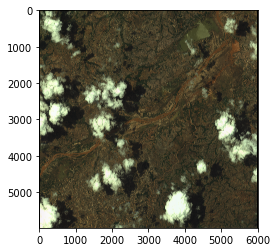

In [ ]:
from skimage.transform import resize
from skimage.io import imread_collection
import cv2 
import numpy as np
from PIL import Image
import os
import glob

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
from torchvision import transforms as tf 

#img = cv2.imread('/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/data/val/val/CLD00025_RGB_K3A_NIA0025.png')

# rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = Image.open(('/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/label/train/train/CLD00001_RGB_K3A_NIA0001_label.png'))
plt.imshow(img)
plt.show()

array_rgb_img = np.array(img)

images_transform = tf.Compose([
        tf.ToTensor(),
        #tf.RandomCrop(size=(512, 512)), 
        tf.ColorJitter( brightness= 0.5, contrast= 0.5, saturation= 0.5 ), #고정된 값을 랜덤하게 매 에포크마다 달라지게함, 인자값 다 달라지게 하기
        tf.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])
    ])

images_trans = images_transform(img)
array_images_trans = np.array(images_trans)
# img_array = np.array(images_trans)
# save_img = Image.fromarray(img_array)
# plt.imshow()

#one_class("/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/data/val/val/CLD00009_MS4_K3A_NIA0009_label.png")

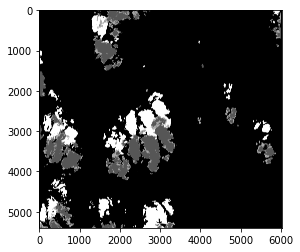

In [ ]:
img = Image.open(('/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/label/train/train/CLD00001_RGB_K3A_NIA0001_label.png'))
image_bw = np.array(img)
plt.imshow(image_bw, cmap='gray')
plt.show()




ModuleNotFoundError: ignored

In [ ]:
labels = torch.ones([4, 512, 512])

In [ ]:
labels.shape[0]

4

In [ ]:
label_0 = labels[0,:,:]
print(label_0.shape)

torch.Size([512, 512])


In [ ]:
# 0만 세는 코드
img_tensor = torch.from_numpy(image_bw)
print(img_tensor.shape)

num_elem = torch.numel(img_tensor)
num_non_zeros = torch.count_nonzero(img_tensor)
print(num_elem)
print(num_non_zeros)

torch.Size([5400, 6015])
32481000
tensor(4562749)


(5980, 6015, 3)
[73 79 64]
(3, 5980, 6015)
[0.3123575  0.8577897  0.22482727]


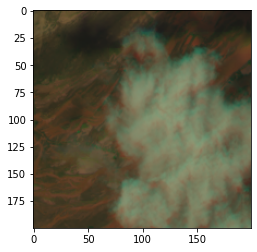

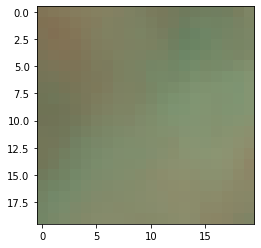

[125 123  92]


In [ ]:
print(array_rgb_img.shape)

print(array_rgb_img[5500][500][:])

print(array_images_trans.shape)
print(array_images_trans[:,500,500])

crop_img = array_rgb_img[2100:2300,4400:4600,:]

plt.imshow(crop_img)
plt.show()

crop_crop_img = crop_img[90:110, 90:110, :]

plt.imshow(crop_crop_img)
plt.show()

print(crop_crop_img[5, 5, :])

In [ ]:
=from skimage.transform import resize
from skimage.io import imread_collection
import cv2 
import numpy as np
from PIL import Image
import os
import glob

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
from torchvision import transforms as tf 


def one_class(img_path):
  # 이미지 경로 가져오기
  print(img_path)
  file_list = os.listdir(img_path)
  print(file_list)
  print(len(file_list))

  for i, img_name in enumerate(file_list):
    print(i)
    img = cv2.imread(img_path+img_name)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_img)
    plt.show()


    # images_transform = tf.Compose([
    #         tf.RandomCrop(size=(512, 512)), 
    #         tf.ColorJitter( brightness= 0.5, contrast= 0.5, saturation= 0.5 ), #고정된 값을 랜덤하게 매 에포크마다 달라지게함, 인자값 다 달라지게 하기
    #         tf.Normalize(mean=[0.485, 0.456, 0.406],
    #                         std=[0.229, 0.224, 0.225])
    #     ])
    
    # img_array = np.array(images_trans)
    # save_img = Image.fromarray(img_array)
    # images_trans = images_transform(img)
    # plt.imshow()

one_class("/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/data/val/val/CLD00009_MS4_K3A_NIA0009_label.png")

In [ ]:
def mini_batch_transform(images):
        images_transform = tf.Compose([
            #et.ExtResize( 224 ),
            tf.RandomCrop(size=(crop_size, crop_size)), 
            tf.ColorJitter( brightness= b, contrast= c, saturation= s ), #고정된 값을 랜덤하게 매 에포크마다 달라지게함, 인자값 다 달라지게 하기
            tf.RandomHorizontalFlip(),
            tf.Normalize(mean=[0.485, 0.456, 0.406],
                            std=[0.229, 0.224, 0.225])
        ])

라벨 데이터 단일화하기

In [ ]:
from skimage.transform import resize
from skimage.io import imread_collection
import cv2 
import numpy as np
from PIL import Image
import os
import glob


def one_class(img_path):
  # 이미지 경로 가져오기
  print(img_path)
  file_list = os.listdir('/content/drive/MyDrive/label_val_png_rgb/png_rgb/')
  print(file_list)
  print(len(file_list))

  for i, img_name in enumerate(file_list):
    print(i)
    img = cv2.imread(img_path+img_name)
    img_array = np.array(img)
    #76 : 짙은 구름만 label
    img_array[img_array == 225 ] = 0 #그림자
    img_array[img_array == 150 ] = 0 #옅은구름
    save_img = Image.fromarray(img_array)
    save_img.save(f'/content/drive/MyDrive/label_img_one_class/val/deep/'+ f'{img_name}')
    # #color_img = Image.open(img_path+img_name)
    # color_img = cv2.imread(img_path+img_name, cv2.IMREAD_COLOR)
    # gray_img = cv2.cvtColor(color_img,cv2.COLOR_BGR2GRAY)
    # save_img = Image.fromarray(gray_img)
    # save_img.save(f'/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/label/val/png_gray/'+ f'{img_name}')

one_class("/content/drive/MyDrive/label_val_png_rgb/png_rgb/")

/content/drive/MyDrive/label_val_png_rgb/png_rgb/
['CLD00043_MS4_K3_NIA0043_label.png', 'CLD00010_MS4_K3A_NIA0010_label.png', 'CLD00009_MS4_K3A_NIA0009_label.png', 'CLD00049_MS4_K3_NIA0049_label.png', 'CLD00064_MS4_K3_NIA0064_label.png', 'CLD00020_MS4_K3A_NIA0020_label.png', 'CLD00080_MS4_K3_NIA0394_label.png', 'CLD00007_MS4_K3A_NIA0007_label.png', 'CLD00006_MS4_K3A_NIA0006_label.png', 'CLD00025_MS4_K3A_NIA0025_label.png', 'CLD00057_MS4_K3_NIA0057_label.png', 'CLD00199_MS4_K3A_NIA1046_label.png', 'CLD00136_MS4_K3_NIA0450_label.png', 'CLD00104_MS4_K3_NIA0418_label.png', 'CLD00156_MS4_K3A_NIA0470_label.png', 'CLD00184_MS4_K3A_NIA0498_label.png']
16
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


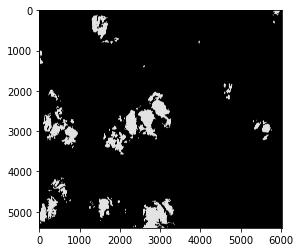

In [ ]:
from skimage.transform import resize
from skimage.io import imread_collection
import cv2 
import numpy as np
from PIL import Image
import os
import glob
import matplotlib.pyplot as plt



img = cv2.imread('/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/label/train/train/CLD00001_RGB_K3A_NIA0001_label.png')
img_array = np.array(img)
#225: 그림자만
img_array[img_array == 76 ] = 0 #짙은구름
img_array[img_array == 150 ] = 0 #옅은구름
save_img = Image.fromarray(img_array)
plt.imshow(save_img)
# img = Image.open("NASA.jpg")
# imgArray = np.array(img)

#그림자만 잘 나옴

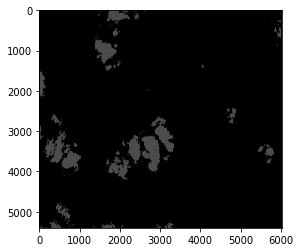

In [ ]:
from skimage.transform import resize
from skimage.io import imread_collection
import cv2 
import numpy as np
from PIL import Image
import os
import glob
import matplotlib.pyplot as plt

img_2 = cv2.imread('/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/label/train/train/CLD00001_RGB_K3A_NIA0001_label.png')
img_array_2 = np.array(img_2)
#76 : 짙은 구름만 label
img_array_2[img_array_2 == 226 ] = 0 #그림자
img_array_2[img_array_2 == 150 ] = 0 #옅은구름
save_img_2 = Image.fromarray(img_array_2)
plt.imshow(save_img_2)
# img = Image.open("NASA.jpg")
# imgArray = np.array(img)

#짙은구름+ 그림자

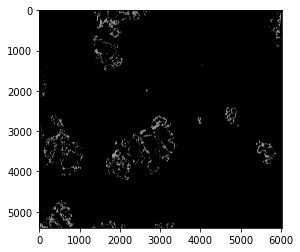

In [ ]:
img = cv2.imread('/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/label/train/train/CLD00001_RGB_K3A_NIA0001_label.png')
img_array = np.array(img)
#150 : 옅은구름만 label
img_array[img_array == 76 ] = 0 #짙은구름

img_array[img_array == 225 ] = 0 #그림자
save_img = Image.fromarray(img_array)
plt.imshow(save_img)
# img = Image.open("NASA.jpg")
# imgArray = np.array(img)
#그림자 + 옅은구름

#빨:짙은
#노:그림자
#초 : 옅은

img_array_2 = np.array(save_img)
img_array_2[img_array_2 == 225 ] = 0 #그림자
save_img_2 = Image.fromarray(img_array_2)
plt.imshow(save_img_2)

이미지 마다 구름 몇 % 점유율 가지고 있는지 확인해보기

1. csv 파일로 변환

In [ ]:
# def convert_grey(img_path):
#   # 이미지 경로 가져오기
#   print(img_path)
#   file_list = os.listdir('/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/label/val/png_rgb/')
#   print(file_list)
#   print(len(file_list))

#   for i, img_name in enumerate(file_list):
#     print(i)
#     #color_img = Image.open(img_path+img_name)
#     color_img = cv2.imread(img_path+img_name, cv2.IMREAD_COLOR)
#     gray_img = cv2.cvtColor(color_img,cv2.COLOR_BGR2GRAY)
#     save_img = Image.fromarray(gray_img)
#     save_img.save(f'/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/label/val/png_gray/'+ f'{img_name}')

# convert_grey("/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/label/val/png_rgb/")

In [ ]:
import os
import numpy as np
from PIL import Image
from skimage.transform import resize
from skimage.io import imread_collection
import cv2 
import pandas as pd

def to_csv(img_path):
  # 이미지 경로 가져오기
  print(img_path)
  file_list = os.listdir('/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/label/val/val/')
  print(file_list)
  print(len(file_list))

  for i, img_name in enumerate(file_list):
    print(i)
    #color_img = Image.open(img_path+img_name)
    img = Image.open(img_path+img_name)
    array = np.array(img)
    df = pd.DataFrame(array)

    df.to_csv(f'/content/drive/MyDrive/csv/val/'+f'{img_name}'+'.csv', index=False)
    #dt.to_csv('C:/Users/abc/Desktop/file_name.csv')

to_csv("/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/label/val/val/")

/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/label/val/val/
['CLD00006_RGB_K3A_NIA0006_label.png', 'CLD00007_RGB_K3A_NIA0007_label.png', 'CLD00009_RGB_K3A_NIA0009_label.png', 'CLD00010_RGB_K3A_NIA0010_label.png', 'CLD00020_RGB_K3A_NIA0020_label.png', 'CLD00025_RGB_K3A_NIA0025_label.png', 'CLD00043_RGB_K3_NIA0043_label.png', 'CLD00049_RGB_K3_NIA0049_label.png', 'CLD00057_RGB_K3_NIA0057_label.png', 'CLD00064_RGB_K3_NIA0064_label.png', 'CLD00080_RGB_K3_NIA0394_label.png', 'CLD00104_RGB_K3_NIA0418_label.png', 'CLD00136_RGB_K3_NIA0450_label.png', 'CLD00156_RGB_K3A_NIA0470_label.png', 'CLD00184_RGB_K3A_NIA0498_label.png', 'CLD00199_RGB_K3A_NIA1046_label.png']
16
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [ ]:
import os
import numpy as np
from PIL import Image
from skimage.transform import resize
from skimage.io import imread_collection
import cv2 
import pandas as pd

def to_csv(img_path):
  # 이미지 경로 가져오기
  print(img_path)
  file_list = os.listdir('/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/label/train/train/')
  print(file_list)
  print(len(file_list))

  for i, img_name in enumerate(file_list):
    print(i)
    #color_img = Image.open(img_path+img_name)
    img = Image.open(img_path+img_name)
    array = np.array(img)
    df = pd.DataFrame(array)

    df.to_csv(f'/content/drive/MyDrive/csv/train/'+f'{img_name}'+'.csv', index=False)
    #dt.to_csv('C:/Users/abc/Desktop/file_name.csv')

to_csv("/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/label/train/train/")

/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/label/train/train/
['CLD00001_RGB_K3A_NIA0001_label.png', 'CLD00004_RGB_K3A_NIA0004_label.png', 'CLD00003_RGB_K3A_NIA0003_label.png', 'CLD00012_RGB_K3A_NIA0012_label.png', 'CLD00005_RGB_K3A_NIA0005_label.png', 'CLD00013_RGB_K3A_NIA0013_label.png', 'CLD00011_RGB_K3A_NIA0011_label.png', 'CLD00008_RGB_K3A_NIA0008_label.png', 'CLD00016_RGB_K3A_NIA0016_label.png', 'CLD00017_RGB_K3A_NIA0017_label.png', 'CLD00019_RGB_K3A_NIA0019_label.png', 'CLD00021_RGB_K3A_NIA0021_label.png', 'CLD00018_RGB_K3A_NIA0018_label.png', 'CLD00033_RGB_K3_NIA0033_label.png', 'CLD00023_RGB_K3A_NIA0023_label.png', 'CLD00022_RGB_K3A_NIA0022_label.png', 'CLD00028_RGB_K3A_NIA0028_label.png', 'CLD00029_RGB_K3A_NIA0029_label.png', 'CLD00035_RGB_K3_NIA0035_label.png', 'CLD00036_RGB_K3_NIA0036_label.png', 'CLD00040_RGB_K3_NIA0040_label.png', 'CLD00039_RGB_K3_NIA0039_label.png', 'CLD00038_RGB_K3_NIA0038_label.png', 'CLD00042_RGB_K3_NIA0042_label.png', 'CL

이미지 파일 하나씩 가져와서 값 카운팅하기

In [ ]:
#이미지 파일 받으면 각 target 값 count

#count 값 리스트에 담기 : ['이미지 파일명', '226:', '76:' '150:']

#count로 추출해낸 각 값으로 점유율 계산하기 = count값/ (h*w)

In [ ]:
import cv2
import os
import numpy as np
from PIL import Image
from skimage.transform import resize
from skimage.io import imread_collection
import pandas as pd

all_percent_lst =[]

def percent_cal(img_path):
  all_img_s = 0
  all_cnt_deep = 0
  all_cnt_light = 0
  all_cnt_shadow = 0
  print(id(all_img_s))

  # 이미지 경로 가져오기
  #print(img_path)
  file_list = os.listdir('/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/label/val/val/')
  #print(file_list)
  #print(len(file_list))

  for i, img_name in enumerate(file_list):
    print(i)
    #color_img = Image.open(img_path+img_name)
    img = Image.open(img_path+img_name)

    arrays = np.array(img)
    img_s = arrays.size
    print(img_s)
    

    cnt_deep = np.count_nonzero(arrays == 76) #위? 아래?
    #print(cnt_deep)
    cnt_light= np.count_nonzero(arrays == 150)
    #print(cnt_light)
    cnt_shadow = np.count_nonzero(arrays == 226)
    #print(cnt_shadow)

    
    #각 이미지에 대한 class별 점유율
    cnt_deep_percent = round((cnt_deep / img_s) * 100, 2)  #TypeError 'int' object is not callable : x.size() 가 아니라 x.size (이유: numpy라서)
    cnt_light_percent = round((cnt_light / img_s) * 100, 2)
    cnt_shadow_percent = round((cnt_shadow / img_s) * 100, 2)

    #가장 많은 class 
    all_img_s += img_s
    all_cnt_deep += cnt_deep
    all_cnt_light += cnt_light
    all_cnt_shadow += cnt_shadow

    all_cnt_deep_percent = round((all_cnt_deep / all_img_s) * 100, 2)
    all_cnt_light_percent = round(( all_cnt_light / all_img_s) * 100, 2)
    all_cnt_shadow_percent = round((all_cnt_shadow / all_img_s) * 100, 2)


    percent_lst = [img_name , cnt_deep_percent, cnt_light_percent, cnt_shadow_percent ]
    print(percent_lst)
    all_percent_lst.append(percent_lst) #리스트 안에 리스트로 추가되는거 맞겠지 > 맞음!
    #print(all_percent_lst)
    


    #return 
  all_percent_array = np.array(all_percent_lst)
  df = pd.DataFrame(all_percent_array, columns=['img_name','deep', 'light', 'shadow'])
  print(df)
  print('짙은 구름의 전체 데이터 중 점유율', all_cnt_deep_percent ,'%')
  print('옅은 구름의 전체 데이터 중 점유율', all_cnt_light_percent ,'%')
  print('구름 그림자의 전체 데이터 중 점유율', all_cnt_shadow_percent ,'%')

percent_cal("/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/label/val/val/")

94270184176096
0
35969700
['CLD00006_RGB_K3A_NIA0006_label.png', 10.26, 9.88, 0.0]
1
35247900
['CLD00007_RGB_K3A_NIA0007_label.png', 6.21, 6.72, 11.78]
2
35909550
['CLD00009_RGB_K3A_NIA0009_label.png', 8.54, 7.64, 1.5]
3
35488500
['CLD00010_RGB_K3A_NIA0010_label.png', 9.35, 6.09, 12.12]
4
31398300
['CLD00020_RGB_K3A_NIA0020_label.png', 3.75, 4.22, 7.27]
5
35969700
['CLD00025_RGB_K3A_NIA0025_label.png', 18.22, 1.94, 11.64]
6
32462955
['CLD00043_RGB_K3_NIA0043_label.png', 0.95, 0.16, 0.0]
7
30514095
['CLD00049_RGB_K3_NIA0049_label.png', 12.43, 2.75, 9.81]
8
31434390
['CLD00057_RGB_K3_NIA0057_label.png', 4.29, 0.43, 3.15]
9
28956210
['CLD00064_RGB_K3_NIA0064_label.png', 12.49, 0.11, 4.3]
10
34357680
['CLD00080_RGB_K3_NIA0394_label.png', 6.24, 3.37, 6.29]
11
34327605
['CLD00104_RGB_K3_NIA0418_label.png', 10.9, 2.18, 9.71]
12
31981755
['CLD00136_RGB_K3_NIA0450_label.png', 16.61, 2.11, 0.36]
13
33744150
['CLD00156_RGB_K3A_NIA0470_label.png', 8.49, 1.65, 5.71]
14
34405800
['CLD00184_RGB_K3A_N

In [ ]:
import cv2
import os
import numpy as np
from PIL import Image
from skimage.transform import resize
from skimage.io import imread_collection
import pandas as pd

all_percent_lst =[]

def percent_cal(img_path):
  all_img_s = 0
  all_cnt_deep = 0
  all_cnt_light = 0
  all_cnt_shadow = 0
  print(id(all_img_s))

  # 이미지 경로 가져오기
  #print(img_path)
  file_list = os.listdir('/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/label/train/train/')
  #print(file_list)
  #print(len(file_list))

  for i, img_name in enumerate(file_list):
    print(i)
    #color_img = Image.open(img_path+img_name)
    img = Image.open(img_path+img_name)

    arrays = np.array(img)
    img_s = arrays.size
    print(img_s)
    

    cnt_deep = np.count_nonzero(arrays == 76) #위? 아래?
    #print(cnt_deep)
    cnt_light= np.count_nonzero(arrays == 150)
    #print(cnt_light)
    cnt_shadow = np.count_nonzero(arrays == 226)
    #print(cnt_shadow)

    
    #각 이미지에 대한 class별 점유율
    cnt_deep_percent = round((cnt_deep / img_s) * 100, 2)  #TypeError 'int' object is not callable : x.size() 가 아니라 x.size (이유: numpy라서)
    cnt_light_percent = round((cnt_light / img_s) * 100, 2)
    cnt_shadow_percent = round((cnt_shadow / img_s) * 100, 2)

    #가장 많은 class 
    all_img_s += img_s
    all_cnt_deep += cnt_deep
    all_cnt_light += cnt_light
    all_cnt_shadow += cnt_shadow

    all_cnt_deep_percent = round((all_cnt_deep / all_img_s) * 100, 2)
    all_cnt_light_percent = round(( all_cnt_light / all_img_s) * 100, 2)
    all_cnt_shadow_percent = round((all_cnt_shadow / all_img_s) * 100, 2)


    percent_lst = [img_name , cnt_deep_percent, cnt_light_percent, cnt_shadow_percent ]
    print(percent_lst)
    all_percent_lst.append(percent_lst) #리스트 안에 리스트로 추가되는거 맞겠지 > 맞음!
    #print(all_percent_lst)
    


    #return 
  all_percent_array = np.array(all_percent_lst)
  df = pd.DataFrame(all_percent_array, columns=['img_name','deep', 'light', 'shadow'])
  print(df)
  print('짙은 구름의 전체 데이터 중 점유율', all_cnt_deep_percent ,'%')
  print('옅은 구름의 전체 데이터 중 점유율', all_cnt_light_percent ,'%')
  print('구름 그림자의 전체 데이터 중 점유율', all_cnt_shadow_percent ,'%')

percent_cal("/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/label/train/train/")

94270184176096
0
32481000
['CLD00001_RGB_K3A_NIA0001_label.png', 5.77, 2.39, 5.88]
1
36210300
['CLD00004_RGB_K3A_NIA0004_label.png', 3.53, 1.55, 4.75]
2
35488500
['CLD00003_RGB_K3A_NIA0003_label.png', 7.01, 3.71, 15.0]
3
35007300
['CLD00012_RGB_K3A_NIA0012_label.png', 12.64, 2.03, 8.47]
4
33563700
['CLD00005_RGB_K3A_NIA0005_label.png', 0.18, 12.02, 0.0]
5
35969700
['CLD00013_RGB_K3A_NIA0013_label.png', 6.33, 1.84, 5.48]
6
33864450
['CLD00011_RGB_K3A_NIA0011_label.png', 8.92, 2.02, 7.06]
7
35548650
['CLD00008_RGB_K3A_NIA0008_label.png', 9.26, 4.4, 1.23]
8
34947150
['CLD00016_RGB_K3A_NIA0016_label.png', 2.97, 4.07, 4.77]
9
34887000
['CLD00017_RGB_K3A_NIA0017_label.png', 0.0, 0.96, 0.0]
10
36150150
['CLD00019_RGB_K3A_NIA0019_label.png', 3.9, 0.32, 1.57]
11
32420850
['CLD00021_RGB_K3A_NIA0021_label.png', 4.08, 2.19, 3.92]
12
32781750
['CLD00018_RGB_K3A_NIA0018_label.png', 7.25, 3.97, 8.0]
13
33894525
['CLD00033_RGB_K3_NIA0033_label.png', 10.82, 2.7, 9.45]
14
36811800
['CLD00023_RGB_K3A_NIA

In [ ]:



array = ['a', 'b', 'c', 'ae', 'ba', 'dab']
cnt = array.count('a')
print('배열 내 a의 등장 횟수 :', cnt)

> 예전




In [ ]:
!unzip /content/drive/MyDrive/Cloud_Dataset/Training/train_cloud_labeling.zip -d /content/drive/MyDrive/Cloud_Dataset/Training

Archive:  /content/drive/MyDrive/Cloud_Dataset/Training/train_cloud_labeling.zip
   creating: /content/drive/MyDrive/Cloud_Dataset/Training/train_clouds_labeling/
  inflating: /content/drive/MyDrive/Cloud_Dataset/Training/train_clouds_labeling/CLD00001_MS4_K3A_NIA0001_label.png  
  inflating: /content/drive/MyDrive/Cloud_Dataset/Training/train_clouds_labeling/CLD00003_MS4_K3A_NIA0003_label.png  
  inflating: /content/drive/MyDrive/Cloud_Dataset/Training/train_clouds_labeling/CLD00004_MS4_K3A_NIA0004_label.png  
  inflating: /content/drive/MyDrive/Cloud_Dataset/Training/train_clouds_labeling/CLD00005_MS4_K3A_NIA0005_label.png  
  inflating: /content/drive/MyDrive/Cloud_Dataset/Training/train_clouds_labeling/CLD00008_MS4_K3A_NIA0008_label.png  
  inflating: /content/drive/MyDrive/Cloud_Dataset/Training/train_clouds_labeling/CLD00011_MS4_K3A_NIA0011_label.png  
  inflating: /content/drive/MyDrive/Cloud_Dataset/Training/train_clouds_labeling/CLD00012_MS4_K3A_NIA0012_label.png  
  inflating

In [ ]:
!unzip /content/drive/MyDrive/Cloud_Dataset/Training/train_clouds_data.zip -d /content/drive/MyDrive/Cloud_Dataset/Training

Archive:  /content/drive/MyDrive/Cloud_Dataset/Training/train_clouds_data.zip
   creating: /content/drive/MyDrive/Cloud_Dataset/Training/train_clouds_data/
   creating: /content/drive/MyDrive/Cloud_Dataset/Training/train_clouds_data/png/
  inflating: /content/drive/MyDrive/Cloud_Dataset/Training/train_clouds_data/png/CLD00001_NGR_K3A_NIA0001.png  
  inflating: /content/drive/MyDrive/Cloud_Dataset/Training/train_clouds_data/png/CLD00001_RGB_K3A_NIA0001.png  
  inflating: /content/drive/MyDrive/Cloud_Dataset/Training/train_clouds_data/png/CLD00003_NGR_K3A_NIA0003.png  
  inflating: /content/drive/MyDrive/Cloud_Dataset/Training/train_clouds_data/png/CLD00003_RGB_K3A_NIA0003.png  
  inflating: /content/drive/MyDrive/Cloud_Dataset/Training/train_clouds_data/png/CLD00004_NGR_K3A_NIA0004.png  
  inflating: /content/drive/MyDrive/Cloud_Dataset/Training/train_clouds_data/png/CLD00004_RGB_K3A_NIA0004.png  
  inflating: /content/drive/MyDrive/Cloud_Dataset/Training/train_clouds_data/png/CLD00005_

In [ ]:
!unzip /content/drive/MyDrive/Cloud_Dataset/Validation/validate_clouds_data.zip -d /content/drive/MyDrive/Cloud_Dataset/Validation

Archive:  /content/drive/MyDrive/Cloud_Dataset/Validation/validate_clouds_data.zip
   creating: /content/drive/MyDrive/Cloud_Dataset/Validation/validate_clouds_data/
   creating: /content/drive/MyDrive/Cloud_Dataset/Validation/validate_clouds_data/png/
  inflating: /content/drive/MyDrive/Cloud_Dataset/Validation/validate_clouds_data/png/CLD00006_NGR_K3A_NIA0006.png  
  inflating: /content/drive/MyDrive/Cloud_Dataset/Validation/validate_clouds_data/png/CLD00006_RGB_K3A_NIA0006.png  
  inflating: /content/drive/MyDrive/Cloud_Dataset/Validation/validate_clouds_data/png/CLD00007_NGR_K3A_NIA0007.png  
  inflating: /content/drive/MyDrive/Cloud_Dataset/Validation/validate_clouds_data/png/CLD00007_RGB_K3A_NIA0007.png  
  inflating: /content/drive/MyDrive/Cloud_Dataset/Validation/validate_clouds_data/png/CLD00009_NGR_K3A_NIA0009.png  
  inflating: /content/drive/MyDrive/Cloud_Dataset/Validation/validate_clouds_data/png/CLD00009_RGB_K3A_NIA0009.png  
  inflating: /content/drive/MyDrive/Cloud_Dat

In [ ]:
!unzip /content/drive/MyDrive/Cloud_Dataset/Validation/validate_clouds_labeling.zip -d /content/drive/MyDrive/Cloud_Dataset/Validation

Archive:  /content/drive/MyDrive/Cloud_Dataset/Validation/validate_clouds_labeling.zip
   creating: /content/drive/MyDrive/Cloud_Dataset/Validation/validate_clouds_labeling/
  inflating: /content/drive/MyDrive/Cloud_Dataset/Validation/validate_clouds_labeling/CLD00006_MS4_K3A_NIA0006_label.png  
  inflating: /content/drive/MyDrive/Cloud_Dataset/Validation/validate_clouds_labeling/CLD00007_MS4_K3A_NIA0007_label.png  
  inflating: /content/drive/MyDrive/Cloud_Dataset/Validation/validate_clouds_labeling/CLD00009_MS4_K3A_NIA0009_label.png  
  inflating: /content/drive/MyDrive/Cloud_Dataset/Validation/validate_clouds_labeling/CLD00010_MS4_K3A_NIA0010_label.png  
  inflating: /content/drive/MyDrive/Cloud_Dataset/Validation/validate_clouds_labeling/CLD00020_MS4_K3A_NIA0020_label.png  
  inflating: /content/drive/MyDrive/Cloud_Dataset/Validation/validate_clouds_labeling/CLD00025_MS4_K3A_NIA0025_label.png  
  inflating: /content/drive/MyDrive/Cloud_Dataset/Validation/validate_clouds_labeling/CL

배치사이즈1 두고, 일단 크롭 안하고 학습 (그건 나중에)  
1) 데이터 가져오기  
2) 데이터 로더 생성  
3) 모델 가져와서 학습  

------
STEP 1. 데이터 가져오기

In [ ]:
import os
import math
import numpy as np
import tensorflow as tf

from PIL import Image
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from glob import glob

from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *

In [ ]:
!cd /content/drive/MyDrive/DeepLabV3Plus-Pytorch-master

In [ ]:
! pip install -r requirements.txt

In [ ]:
from glob import glob
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter

In [ ]:
from glob import glob
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter


def img_counts(img_path):
  file_list = os.listdir('/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/label/val/val/')
  all_img_list = []

  for i, img_name in enumerate(file_list):
    img = Image.open(img_path+img_name)
    print(i)
    arrays = np.array(img)

    img_list = [img_name]

    if (np.any(arrays == 76)):
      img_list.append("D")

    if (np.any(arrays == 226)):
      img_list.append("S")

    if (np.any(arrays == 150)):
      img_list.append("L")

    all_img_list.append(img_list)
    print(img_list)
    print(all_img_list)

    cnt_deep = np.count_nonzero(arrays == 76) #위? 아래?

    cnt_deep = collections.Counter(all_img_list)["D"]
    cnt_shadow = collections.Counter(all_img_list)["S"]
    cnt_light = collections.Counter(all_img_list)["L"]

    # cnt_deep = (all_img_list == "D").sum()
    # cnt_shadow = (all_img_list == "S").sum()
    # cnt_light = (all_img_list == "L").sum()

    # cnt_deep = all_img_list.count("D")  
    # cnt_shadow = all_img_list.count("S")
    # cnt_light = all_img_list.count("L")

    # cnt_deep = np.count_nonzero(all_img_list == "D")
    # cnt_shadow = np.count_nonzero(all_img_list == "S")
    # cnt_light = np.count_nonzero(all_img_list == "L")

    print(cnt_deep, cnt_shadow, cnt_light)

    # a = 0
    # if "D" in all_img_list:
    #   a +=1 

    # b = 0
    # if "S" in all_img_list:
    #   b +=1

    # c = 0
    # if "L" in all_img_list:
    #   c +=1

    # print(a,b,c)
  





img_counts('/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/label/val/val/')

0
['CLD00006_RGB_K3A_NIA0006_label.png', 'D', 'L']
[['CLD00006_RGB_K3A_NIA0006_label.png', 'D', 'L']]


NameError: ignored

In [ ]:
from glob import glob
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter


def img_counts(img_path):
  file_list = os.listdir('/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/label/val/val/')
  all_img_list = []

  for i, img_name in enumerate(file_list):
    img = Image.open(img_path+img_name)
    print(i)
    arrays = np.array(img)

    img_list = [img_name]

    if (np.any(arrays == 76)):
      img_list.append(76)

    if (np.any(arrays == 226)):
      img_list.append(226)

    if (np.any(arrays == 150)):
      img_list.append(150)

    all_img_list.append(img_list) 
    print(img_list)
    print(all_img_list)


    all_img_array = np.array(all_img_list)

    cnt_deep = np.count_nonzero(all_img_array == 76)
    cnt_shadow = np.count_nonzero(all_img_array == 226)
    cnt_light = np.count_nonzero(all_img_array == 150)

    print(cnt_deep, cnt_shadow, cnt_light)


     # cnt_deep = collections.Counter(all_img_list)["D"]
    # cnt_shadow = collections.Counter(all_img_list)["S"]
    # cnt_light = collections.Counter(all_img_list)["L"]

    # cnt_deep = (all_img_list == "D").sum()
    # cnt_shadow = (all_img_list == "S").sum()
    # cnt_light = (all_img_list == "L").sum()

    # cnt_deep = all_img_list.count("D")  
    # cnt_shadow = all_img_list.count("S")
    # cnt_light = all_img_list.count("L")
    # a = 0
    # if "D" in all_img_list:
    #   a +=1 

    # b = 0
    # if "S" in all_img_list:
    #   b +=1

    # c = 0
    # if "L" in all_img_list:
    #   c +=1

    # print(a,b,c)
  





img_counts('/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/label/val/val/')

0
['CLD00006_RGB_K3A_NIA0006_label.png', 76, 150]
[['CLD00006_RGB_K3A_NIA0006_label.png', 76, 150]]
0 0 0
1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


['CLD00007_RGB_K3A_NIA0007_label.png', 76, 226, 150]
[['CLD00006_RGB_K3A_NIA0006_label.png', 76, 150], ['CLD00007_RGB_K3A_NIA0007_label.png', 76, 226, 150]]
0 0 0
2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


['CLD00009_RGB_K3A_NIA0009_label.png', 76, 226, 150]
[['CLD00006_RGB_K3A_NIA0006_label.png', 76, 150], ['CLD00007_RGB_K3A_NIA0007_label.png', 76, 226, 150], ['CLD00009_RGB_K3A_NIA0009_label.png', 76, 226, 150]]
0 0 0
3
['CLD00010_RGB_K3A_NIA0010_label.png', 76, 226, 150]
[['CLD00006_RGB_K3A_NIA0006_label.png', 76, 150], ['CLD00007_RGB_K3A_NIA0007_label.png', 76, 226, 150], ['CLD00009_RGB_K3A_NIA0009_label.png', 76, 226, 150], ['CLD00010_RGB_K3A_NIA0010_label.png', 76, 226, 150]]
0 0 0
4
['CLD00020_RGB_K3A_NIA0020_label.png', 76, 226, 150]
[['CLD00006_RGB_K3A_NIA0006_label.png', 76, 150], ['CLD00007_RGB_K3A_NIA0007_label.png', 76, 226, 150], ['CLD00009_RGB_K3A_NIA0009_label.png', 76, 226, 150], ['CLD00010_RGB_K3A_NIA0010_label.png', 76, 226, 150], ['CLD00020_RGB_K3A_NIA0020_label.png', 76, 226, 150]]
0 0 0
5
['CLD00025_RGB_K3A_NIA0025_label.png', 76, 226, 150]
[['CLD00006_RGB_K3A_NIA0006_label.png', 76, 150], ['CLD00007_RGB_K3A_NIA0007_label.png', 76, 226, 150], ['CLD00009_RGB_K3A_NIA00